In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)


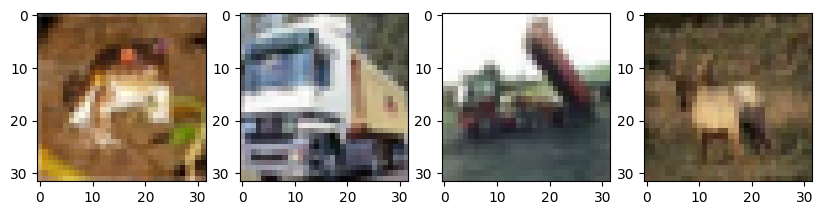

In [3]:
from random import randint
f, axarr = plt.subplots(1, 4, figsize=(10, 10))
for i in range(4):
    axarr[i].imshow(x_train[i])

In [4]:
x_train = x_train / 255
x_test = x_test / 255

In [5]:
from tensorflow.keras.utils import to_categorical
print(f'y_train: {y_train.shape} y_test: {y_test.shape}')
y_cat_train = to_categorical(y_train, num_classes=10) # num_classes can be inferred
y_cat_test = to_categorical(y_test)
print(f'y_cat_train: {y_cat_train.shape} y_cat_test: {y_cat_test.shape} ')

y_train: (50000, 1) y_test: (10000, 1)
y_cat_train: (50000, 10) y_cat_test: (10000, 10) 


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation='relu'))
# Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten Layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))

# Output Layer
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [9]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
   1/1563 [..............................] - ETA: 7:57 - loss: 2.3248 - accuracy: 0.0625

2023-07-01 13:55:16.961750: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1562/1563 [============================>.] - ETA: 0s - loss: 1.6066 - accuracy: 0.4164

2023-07-01 13:55:30.515574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 15s 10ms/step - loss: 1.6066 - accuracy: 0.4164 - val_loss: 1.4573 - val_accuracy: 0.4870
Epoch 2/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.8938 - accuracy: 0.4418 - val_loss: 2.6404 - val_accuracy: 0.4061
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 6.3000 - accuracy: 0.3817 - val_loss: 9.9288 - val_accuracy: 0.3840


In [10]:
metrics = pd.DataFrame(model.history.history)

In [11]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

In [12]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.606573,0.41640,1.457263,0.4870
1,1.893774,0.44182,2.640390,0.4061
2,6.300044,0.38170,9.928757,0.3840


<Axes: >

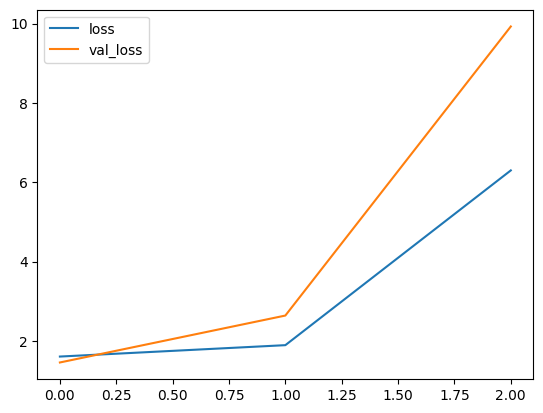

In [13]:
metrics[['loss', 'val_loss']].plot()

<Axes: >

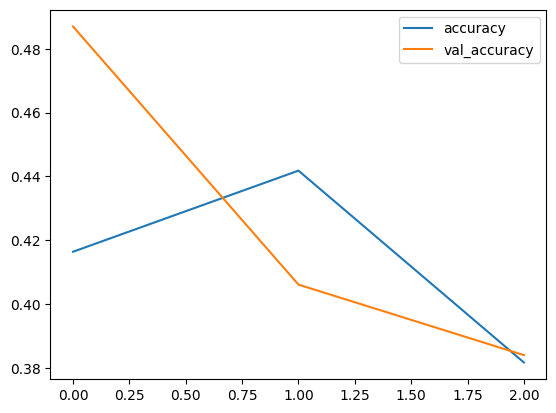

In [14]:
metrics[['accuracy', 'val_accuracy']].plot()

In [15]:
model.evaluate(x_test, y_cat_test, verbose=0)

[9.928756713867188, 0.3840000033378601]

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = model.predict(x_test)

In [18]:
print(classification_report(y_test, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.47      0.57      0.52      1000
           1       0.77      0.15      0.25      1000
           2       0.31      0.31      0.31      1000
           3       0.29      0.25      0.27      1000
           4       0.28      0.38      0.32      1000
           5       0.33      0.40      0.36      1000
           6       0.49      0.40      0.44      1000
           7       0.82      0.18      0.30      1000
           8       0.50      0.46      0.48      1000
           9       0.33      0.74      0.46      1000

    accuracy                           0.38     10000
   macro avg       0.46      0.38      0.37     10000
weighted avg       0.46      0.38      0.37     10000



<Axes: >

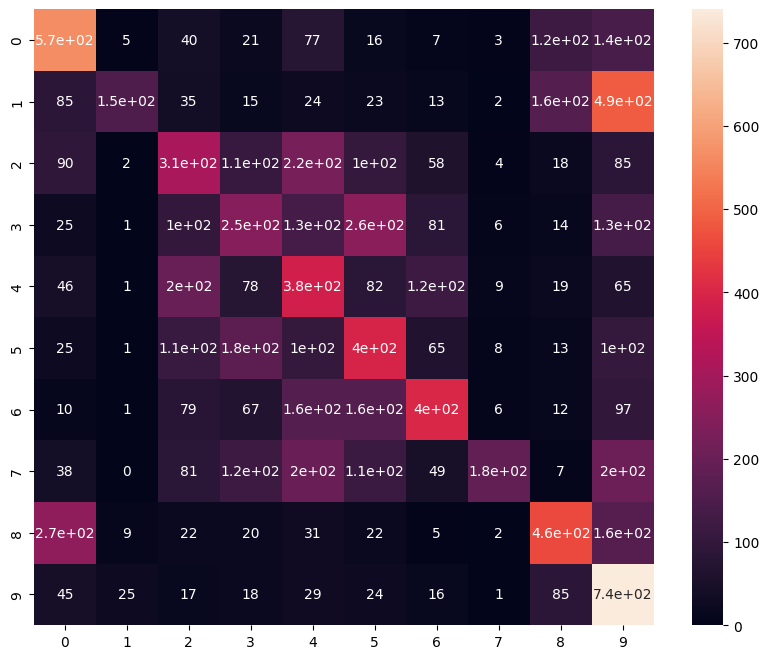

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, predictions.argmax(axis=1)), annot=True)

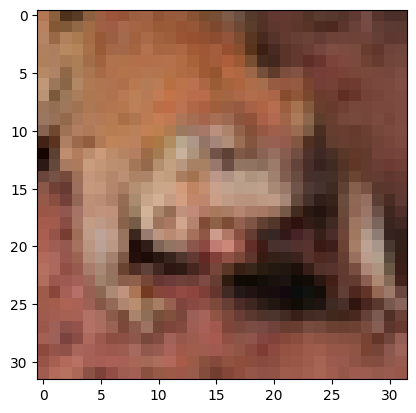

In [20]:
# Predicting a given image
my_image = x_test[5]
plt.imshow(my_image)

In [21]:
my_image.shape

(32, 32, 3)

In [22]:
prediction = model.predict(my_image.reshape(1, 32, 32, 3))

1/1 [==============================] - 0s 28ms/step


Text(0.5, 1.0, 'Prediction Probabilities')

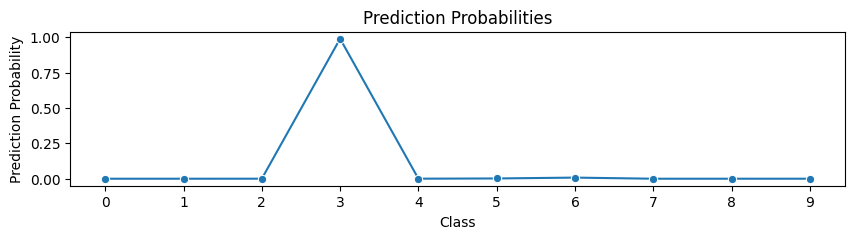

In [23]:

classes = [str(i) for i in range(10)]
# Squeeze to remove single-dimensional entries from the shape of an array.
df = pd.DataFrame({'Class': classes, 'Prediction Probability': np.squeeze(prediction)})

# plot the data using seaborn
plt.figure(figsize=(10,2))
sns.lineplot(data=df, x='Class', y='Prediction Probability', marker="o")
plt.title('Prediction Probabilities')